# Задача 12

Предсказать сорт винограда, из которого сделано вино, используя результаты химических анализов , c помощью KNN — метода k ближайших соседей с тремя различными метриками. Построить график зависимости величины ошибки от числа соседей $k$.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm_notebook

plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 24

Загрузим датасет с информацией о винах:

In [2]:
wine_data = pd.read_csv('wine.data', header=None)
wine_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Загруженные данные не содержат пропусков, признакии являются действительными числами, поэтому их можно использовать для обучения модели без предварительной обработки.

Реализуем KNN. Из опсания данных видно, что классы достаточно сбалансированы, поэтому в качестве метрики качества будем использовать accuracy. В качестве метрик для классификатора будем использовать евклидову, манхэттенскую и чебышевсткую метрики, предварительно зафиксировав `random_state` для воспроизводимости результатов:

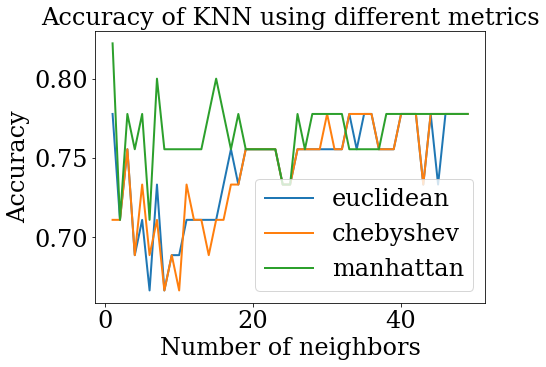

In [5]:
data = wine_data.drop([0], axis=1)
target = wine_data[0]

data_train, data_test, target_train, target_test = train_test_split(data, target, random_state=42)


def train_knn(data_train, data_test, target_train, target_test,
             metric='minkowski'):
    neighbors_cnt = np.arange(1, 50)
    accuracies = []
    for n_neighbors in neighbors_cnt:
        model = KNeighborsClassifier(n_neighbors=n_neighbors, 
                                    metric=metric, n_jobs=-1)
        model.fit(data_train, target_train)
        target_pred = model.predict(data_test)
        accuracy = accuracy_score(target_pred, target_test)
        accuracies.append(accuracy)
    return accuracies

plt.figure(figsize=(7, 5))
for metric in ('euclidean', 'chebyshev', 'manhattan'):
    acc = train_knn(data_train, data_test, target_train, target_test, metric=metric)
    plt.plot(np.arange(1, 50), acc, label=metric)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy of KNN using different metrics')
plt.legend()
plt.savefig('accuracy_plot.png', dpi=300)
plt.show()

Из графика видно, что евклидова и чебышевская метрика в зависимости от числа соседей ведут себя схожим образом, в то время как манхэттенская метрика почти при всех значениях $k$ показывает несколько лучший результат. Другое наблюдение, касающееся манхэттенской метрики, заключается в том, что значение accuracy при ее использовании слабо зависит от $k$, в отличие от евклидовой и чебышевской метрик, имеющих явный спад на графике при $k$ примерно равном $10$. 

Таким образом, из графика можно сделать вывод, что хотя все три метрики показывают в целом схожие значения точности, наилучший результат `accuracy = 0.82` можно получить, используя манхэттенскую метрику при $k = 1$ (т. е. метод ближайшего соседа).